In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

<img src = '../ggplot2_twovariable.png'/>

# Rug plots in the Margins

**`geom_rug()`**: A rug plot is a compact visualisation designed to supplement a 2d display with the two 1d marginal distributions. Rug plots display individual cases so are best used with smaller datasets.

```R
geom_rug(
  mapping = NULL,
  data = NULL,
  stat = "identity",
  position = "identity",
  ...,
  outside = FALSE,
  sides = "bl",
  length = unit(0.03, "npc"),
  na.rm = FALSE,
  show.legend = NA,
  inherit.aes = TRUE
)
```

**Arguments**  
`outside`	
logical that controls whether to move the rug tassels outside of the plot area. Default is off (FALSE). You will also need to use coord_cartesian(clip = "off"). When set to TRUE, also consider changing the sides argument to "tr". See examples.

`sides`	
A string that controls which sides of the plot the rugs appear on. It can be set to a string containing any of "trbl", for top, right, bottom, and left.

`length`	
A grid::unit() object that sets the length of the rug lines. Use scale expansion to avoid overplotting of data.

**Details**
By default, the rug lines are drawn with a length that corresponds to 3% of the total plot size. Since the default scale expansion of for continuous variables is 5% at both ends of the scale, the rug will not overlap with any data points under the default settings.

### Aesthetics

**geom_rug()** understands the following aesthetics (required aesthetics are in bold):

* alpha

* colour

* group

* linetype

* size

* x

* y

In [5]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [7]:
fig <- ggplot(iris, aes(Sepal.Length, Sepal.Width)) + geom_point(aes(color = Species))

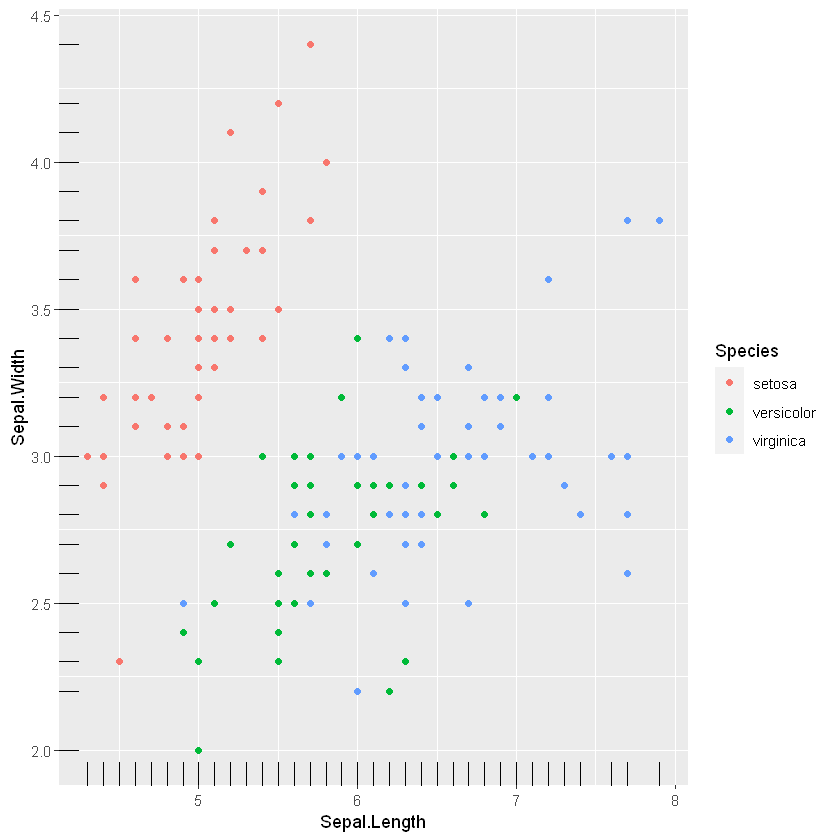

In [8]:
fig +
geom_rug()

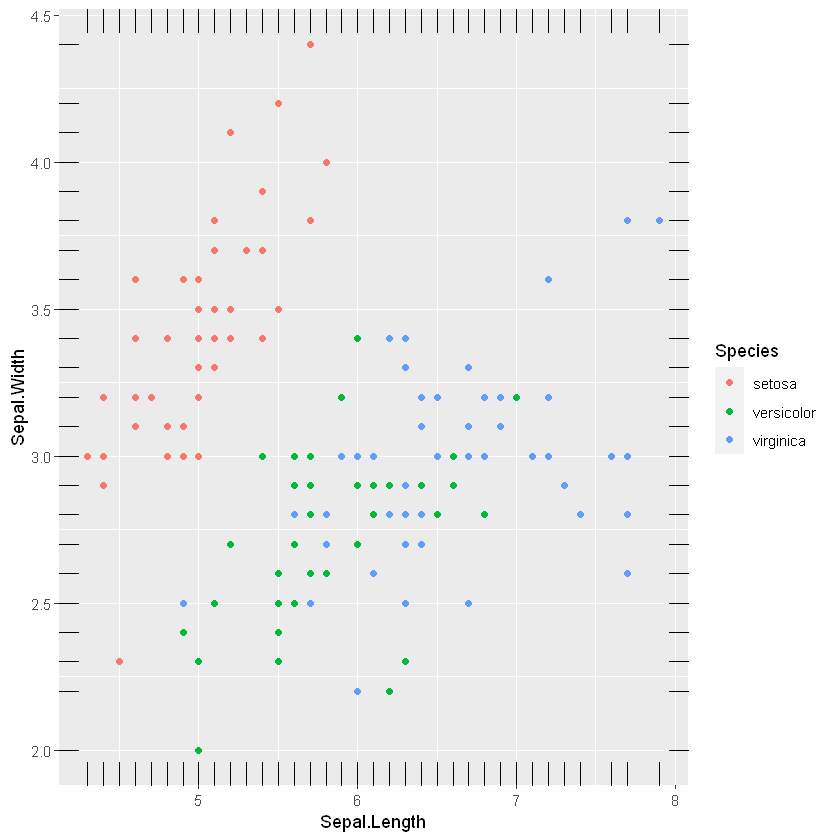

In [9]:
fig + 
geom_rug(sides = 'ltrb') #show rugs on left, top, rigth, bottom

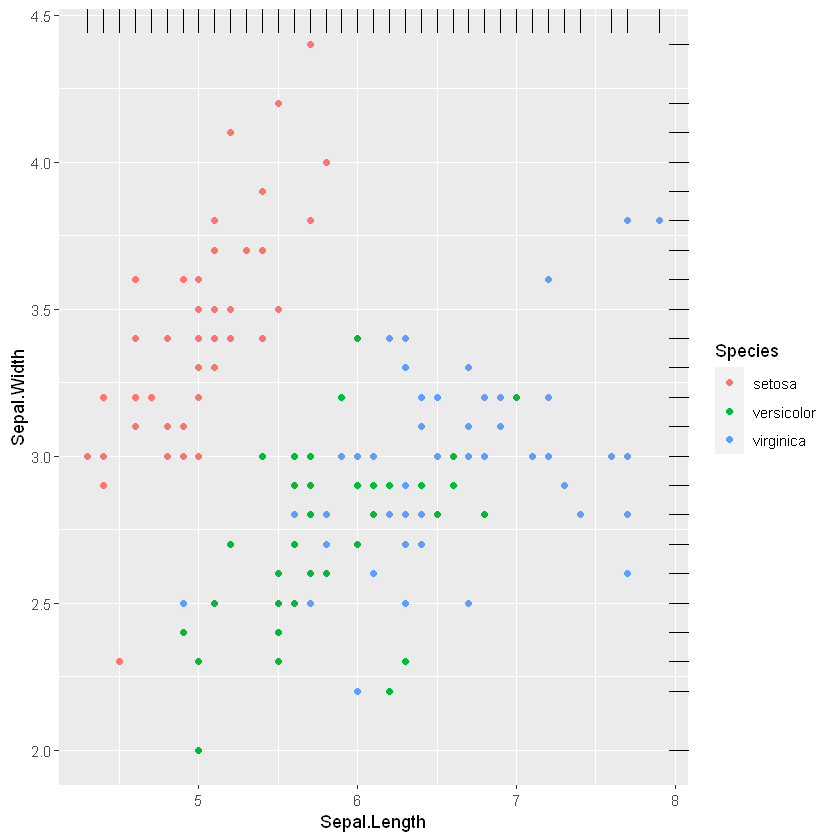

In [10]:
fig +
geom_rug(sides = 'tr') #show rugs on top and right

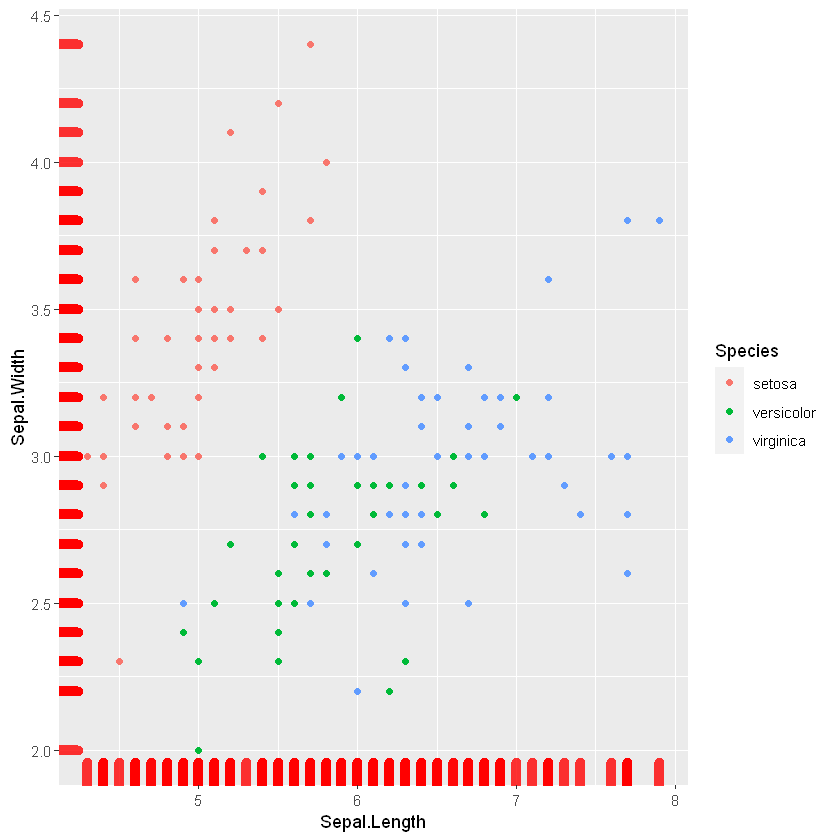

In [33]:
#customization
fig +
geom_rug(color = 'red',     
        size = 3,            
        alpha = .8
        )

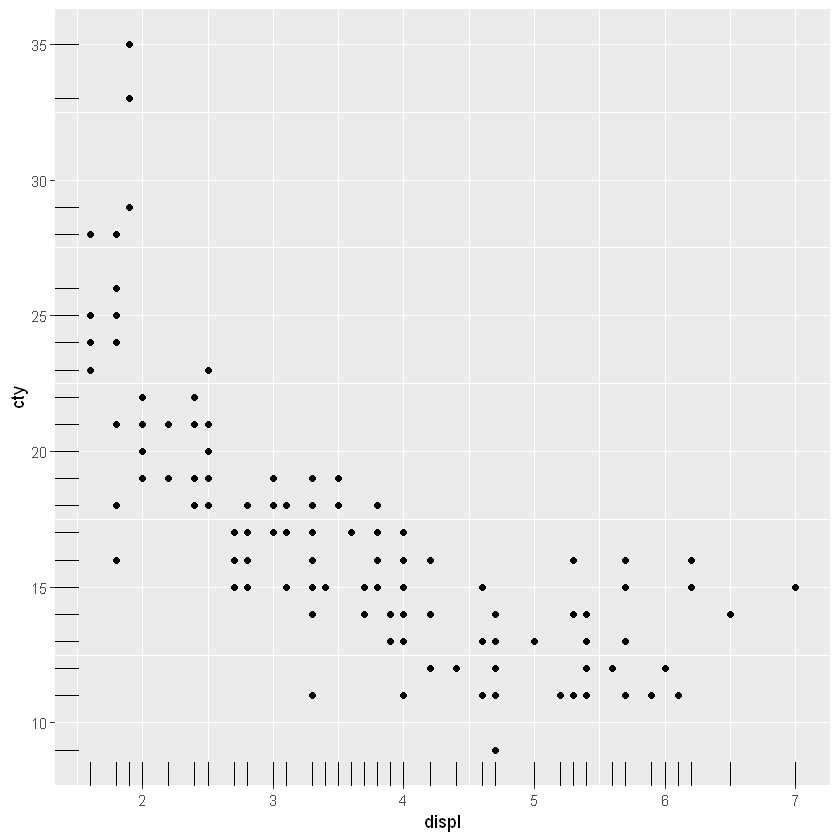

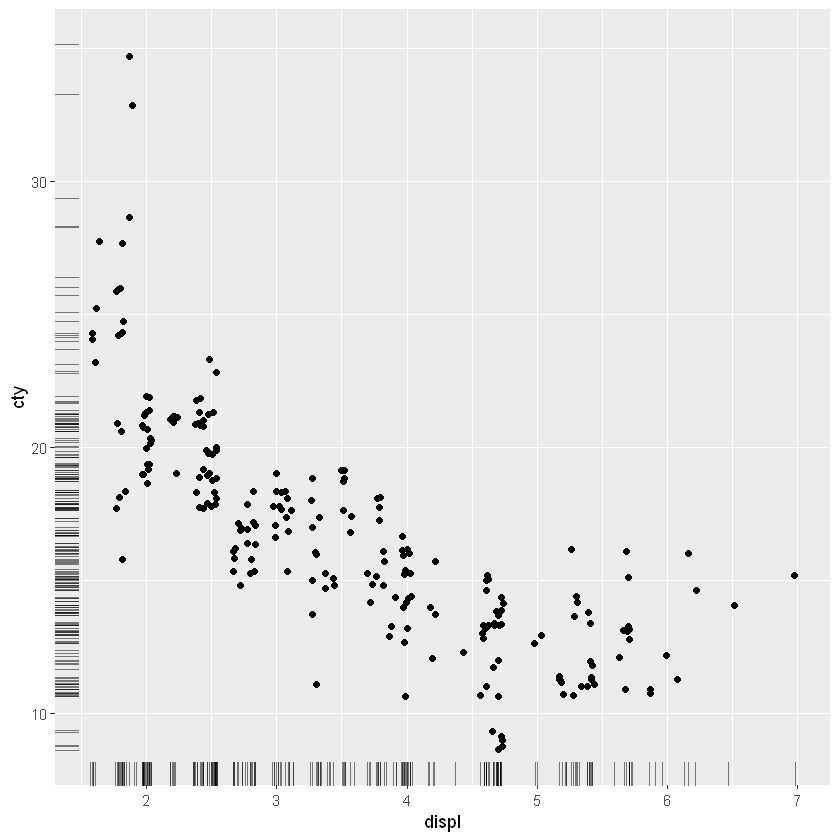

In [27]:
# Use jittering to avoid overplotting for smaller datasets
ggplot(mpg, aes(displ, cty)) +
geom_point() +
geom_rug()

ggplot(mpg, aes(displ, cty)) +
geom_jitter() +
geom_rug(alpha = 1/2, position = "jitter")

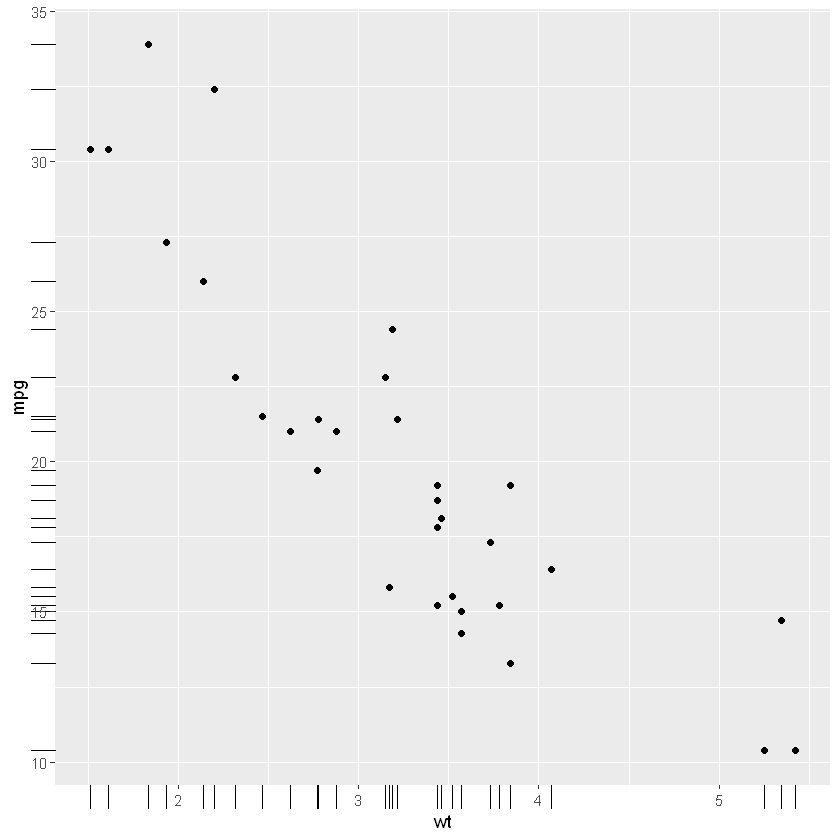

In [16]:
# move the rug tassels to outside the plot
# remember to set clip = "off".
ggplot(mtcars, aes(wt, mpg)) +
geom_point() + 
geom_rug(outside = TRUE) +
coord_cartesian(clip = "off")


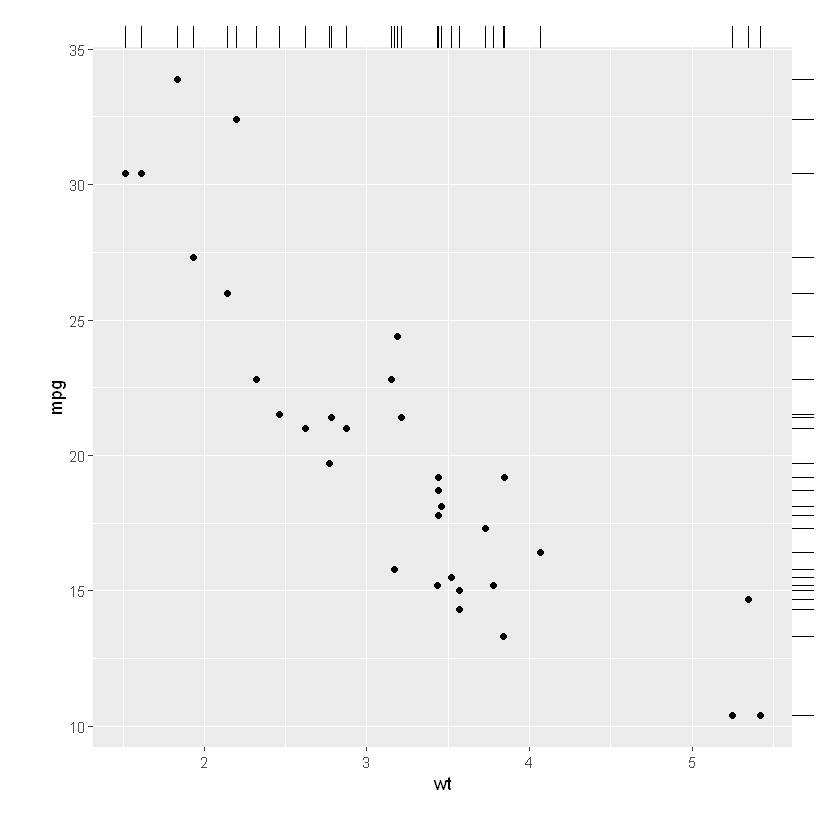

In [24]:
# set sides to top right, and then move the margins
ggplot(mtcars, aes(wt, mpg)) +
geom_point() + 
geom_rug(outside = TRUE, sides = "tr") +
coord_cartesian(clip = "off") +
theme(plot.margin = margin(1, 1, 1, 1, "cm"))

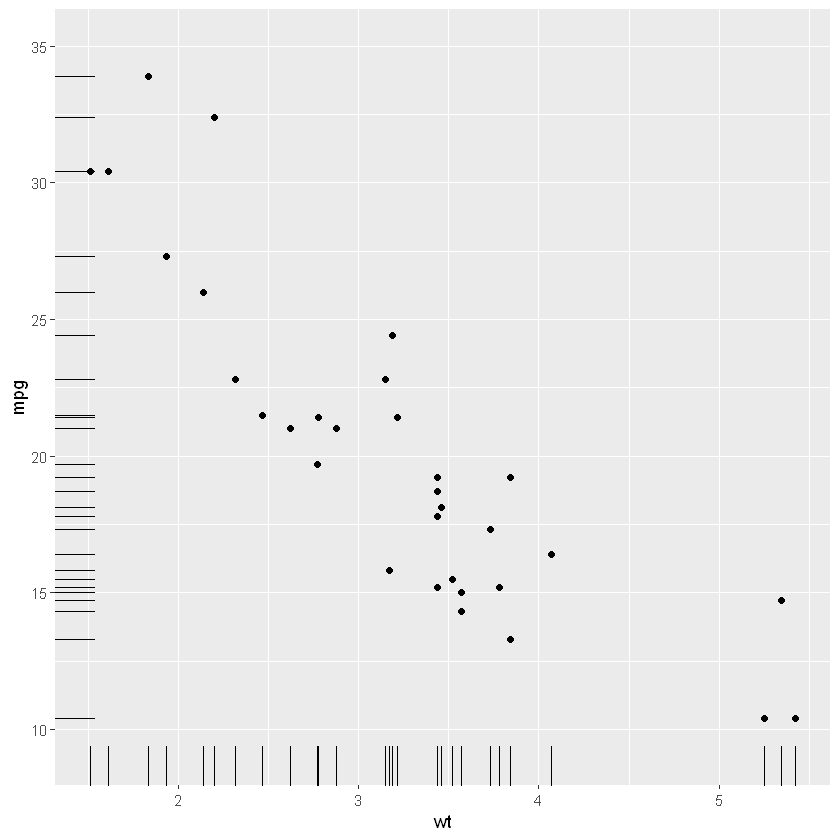

In [26]:
# increase the line length and
# expand axis to avoid overplotting
ggplot(mtcars, aes(wt, mpg)) +
geom_point() + 
geom_rug(length = unit(0.05, "npc")) +
scale_y_continuous(expand = c(0.1, 0.1))